# Import libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords
import emoji
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Read the data

In [143]:
AllTweets = pd.read_excel('Data/COVID-19 Master Sheet 24Sept20.xlsx')

AllTweets['A Codes #'] = AllTweets['A Codes #'].replace('?', np.nan)

AllTweets.dropna(inplace=True)

#the index numbers are not correct so we reindex the dataframe
AllTweets.reset_index(drop=True, inplace=True)

AllTweets

Number  A Codes #        Date  \
0          1       99.0  2020-09-07   
1          2        2.0  2020-09-07   
2          3        2.0  2020-09-07   
3          4        1.0  2020-09-07   
4          5       99.0  2020-09-07   
5          6       98.0  2020-09-07   
6          7        4.0  2020-09-07   
7          8       99.0  2020-09-07   
8          9       98.0  2020-09-07   
9         10        3.0  2020-09-07   
10        11        8.0  2020-09-07   
11        12       99.0  2020-09-07   
12        13       99.0  2020-09-07   
13        14       99.0  2020-09-07   
14        15        2.0  2020-09-07   
15        16        4.0  2020-09-07   
16        17       99.0  2020-09-06   
17        18        5.0  2020-09-06   
18        19       99.0  2020-09-06   
19        20        6.0  2020-09-06   
20        21        4.0  2020-09-06   
21        22        4.0  2020-09-06   
22        23       99.0  2020-09-06   
23        24        3.0  2020-09-06   
24        25        5.0  2020-09-06   
25        26        2.0  2020-09-06   
26        27        7.0  2020-09-06   
27        28       98.0  2020-09-06   
28        29        4.0  2020-09-06   
29        30       99.0  2020-09-06   
...      ...        ...         ...   
1338    3975        4.0  2020-09-06   
1339    3976      100.0  2020-09-06   
1340    3977        4.0  2020-09-06   
1341    3978       99.0  2020-09-04   
1342    3979        4.0  2020-09-04   
1343    3980        6.0  2020-09-04   
1344    3981       99.0  2020-09-04   
1345    3982        4.0  2020-09-04   
1346    3983       99.0  2020-09-04   
1347    3984       99.0  2020-09-04   
1348    3985        4.0  2020-09-04   
1349    3986        3.0  2020-09-04   
1350    3987        4.0  2020-09-03   
1351    3988       99.0  2020-09-03   
1352    3989       98.0  2020-09-03   
1353    3990       98.0  2020-09-03   
1354    3991       99.0  2020-09-03   
1355    3992       99.0  2020-09-03   
1356    3993        1.0  2020-09-03   
1357    3994        7.0  2020-09-03   
1358    3995        4.0  2020-09-03   
1359    3996        4.0  2020-09-03   
1360    3997       99.0  2020-09-03   
1361    3998       99.0  2020-09-03   
1362    3999        4.0  2020-09-03   
1363    4000       99.0  2020-09-03   
1364    4001       99.0  2020-09-03   
1365    4002        6.0  2020-09-02   
1366    4003        6.0  2020-09-02   
1367    4004       99.0  2020-09-02   

                                                   Text  
0     Man I tried. I had a gal lined up to join Mili...  
1     My grandmother requires 24/7 supervision due t...  
2     I cry too, my 92 year old mum with advanced de...  
3     Now that covid has killed my mom I am going to...  
4     Depends on the comorbidities. When I see them ...  
5     My friends nan had dementia for ages and she w...  
6     Watched another heart breaking story of dement...  
7     It's about Labor UNIONS. You know the thing th...  
8     My mum received the covid virus as a free gift...  
9     Really cross to be told my mum - dementia and ...  
10    Or live alone with dementia and all the troubl...  
11    Youre right actually, he decelerated our respo...  
12    So you’re going to cut me off because I don’t ...  
13    Months before my father-in-law was diagnosed w...  
14    We too live in Cornwall, with 90yr Mammy on th...  
15    My grandpa fell and hit his head and has been ...  
16    Some people have it hard at the other extreme....  
17    I've seen a massive rise & progression in deme...  
18    My Mum is in a nursing home with Dementia wher...  
19    Depending on the status of COVID in your area,...  
20    This is so unfair 😭 my papaw has alzheimers/de...  
21    I sympathise. My mother-in-law's care home has...  
22    I detest Johnson and his cohort with every fib...  
23    Would help me in paying medical bills for my d...  
24    My son has CHD and has been no masks in classr...  
25    I just got off the phone w/ my aunt(mothers si...  
26    For me when I a

In [79]:
AllTweets['A Codes #'].value_counts()

99.0     455
4.0      239
2.0      170
98.0     140
3.0      132
1.0       98
6.0       53
5.0       44
9.0       15
7.0       14
100.0      6
8.0        2
Name: A Codes #, dtype: int64

In [80]:
AllTweets.dtypes

Number         int64
A Codes #    float64
Date          object
Text          object
Class          int64
dtype: object

# Creat binary classes

In [144]:
AllTweets['Class'] = 1
AllTweets.loc[AllTweets['A Codes #'].astype(int) > 97, 'Class'] = -1
AllTweets.drop(['Number', 'A Codes #', 'Date'], axis=1, inplace=True)
AllTweets

Text  Class
0     Man I tried. I had a gal lined up to join Mili...     -1
1     My grandmother requires 24/7 supervision due t...      1
2     I cry too, my 92 year old mum with advanced de...      1
3     Now that covid has killed my mom I am going to...      1
4     Depends on the comorbidities. When I see them ...     -1
5     My friends nan had dementia for ages and she w...     -1
6     Watched another heart breaking story of dement...      1
7     It's about Labor UNIONS. You know the thing th...     -1
8     My mum received the covid virus as a free gift...     -1
9     Really cross to be told my mum - dementia and ...      1
10    Or live alone with dementia and all the troubl...      1
11    Youre right actually, he decelerated our respo...     -1
12    So you’re going to cut me off because I don’t ...     -1
13    Months before my father-in-law was diagnosed w...     -1
14    We too live in Cornwall, with 90yr Mammy on th...      1
15    My grandpa fell and hit his head and has been ...      1
16    Some people have it hard at the other extreme....     -1
17    I've seen a massive rise & progression in deme...      1
18    My Mum is in a nursing home with Dementia wher...     -1
19    Depending on the status of COVID in your area,...      1
20    This is so unfair 😭 my papaw has alzheimers/de...      1
21    I sympathise. My mother-in-law's care home has...      1
22    I detest Johnson and his cohort with every fib...     -1
23    Would help me in paying medical bills for my d...      1
24    My son has CHD and has been no masks in classr...      1
25    I just got off the phone w/ my aunt(mothers si...      1
26    For me when I am having a really bad day I do ...      1
27    My neighbors father had advanced dementia and ...     -1
28    In the U.K. my relative with dementia was upse...      1
29    Where the fuck were these in Feb/March when my...     -1
...                                                 ...    ...
1338  I cannot wait to welcome our amazing @Wellbein...      1
1339  I would love to know dementia sufferers ‘covid...     -1
1340  A friends father passed recently in aged care,...      1
1341  The challenges of COVID-19 for people with Dem...     -1
1342  Yeah all go to the pub! You can’t catch covid ...      1
1343  Researchers at @ucl have developed a decision ...      1
1344  Ostrich's Mobility Scooter Classic Ex allows y...     -1
1345  That's just ridiculous - after what happened a...      1
1346  Supporting family carers of people living with...     -1
1347  People go through grief of many sorts every da...     -1
1348  Family visits are critical to the welfare of d...      1
1349  Help care for elderly family member with onset...      1
1350  Covid has shone a very strong light on the imp...      1
1351  This Hall of Famer would find NBC’s story that...     -1
1352  SHE DIDN’T HAVE ADVANCED DEMENTIA...likely del...     -1
1353  The original story I read the family said noth...     -1
1354  Let this fact sink in... #MoreThanCare #elderl...     -1
1355  Of course he did — Dwayne was caught in a cozy...     -1
1356  We lost a family member to covid who was in a ...      1
1357  I’m working with a family rn who’s daughter ca...      1
1358  Diane on @bbc5live 8.15am one of most powerful...      1
1359  “It’s family that ties it all together.” Heart...      1
1360  HC are not Gardener. Gardener retired due to c...     -1
1361  They said he died of complications of dementia...     -1
1362  This is what COVID 19 has done to some familie...      1
1363  the release from the family through the Hall s...     -1
1364  Yes. Dementia and effects of Covid-19 accordin...     -1
1365  September is #WorldAlzMonth. This year #Memory...      1
1366  Due COVID-19 restrictions #MemoryWalks will no...      1
1367  What makes you think aged care providers weren...     -1

[1368 rows x 2 columns]

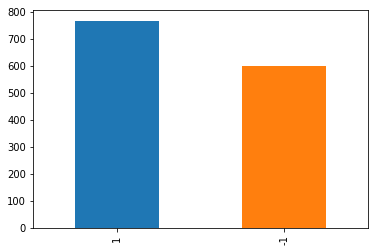

In [109]:
AllTweets['Class'].value_counts().plot(kind='bar')

# Text cleaning and preparation

## Remove emojis 

In [145]:
def remove_emojis(text: str) -> str:
    return ''.join(c for c in text if c not in emoji.UNICODE_EMOJI)

AllTweets['Text_Cleaned'] = [remove_emojis(item) for item in AllTweets['Text']]

## Special character cleaning

We can see the following special characters:

1. \r
2. \n
3. \ before possessive pronouns (government's = government\'s)
4. \ before possessive pronouns 2 (Yukos' = Yukos\')
5. " when quoting text


In [146]:
# \r and \n
AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.replace("\r", " ")
AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.replace("\n", " ")
AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.replace("    ", " ")

## Upcase/downcase 

We'll downcase the texts because we want, for example, Football and football to be the same word.

In [147]:
AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.lower()

## Possessive pronouns 

In [148]:
AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.replace("'s", "")

## Punctuation signs

In [149]:
punctuation_signs = list(punctuation)

for punct_sign in punctuation_signs:
    AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.replace(punct_sign, '')

## Stemming and Lemmatization 

Since stemming can produce output words that don't exist, we'll only use a lemmatization process at this moment. Lemmatization takes into consideration the morphological analysis of the words and returns words that do exist, so it will be more useful for us.

In [150]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
------------------------------------------------------------
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mahsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [151]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()



In order to lemmatize, we have to iterate through every word:


In [152]:
nrows = len(AllTweets)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = AllTweets.loc[row]['Text_Cleaned']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [153]:
AllTweets['Text_Cleaned_2'] = lemmatized_text_list

## Remove stop words

In [156]:
stop_words = list(stopwords.words('english'))

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    AllTweets['Text_Cleaned_2'] = AllTweets['Text_Cleaned_2'].str.replace(regex_stopword, '')

In [158]:
AllTweets.loc[5]['Text']

'My friends nan had dementia for ages and she was put down as a covid death?'

In [157]:
AllTweets.loc[5]['Text_Cleaned']

'my friends nan had dementia for ages and she was put down as a covid death'

In [159]:
AllTweets.loc[5]['Text_Cleaned_2']

' friends nan  dementia  age    put    covid death'

# Create the model 

##  Train - test split 

In [163]:
X_train, X_test, y_train, y_test = train_test_split(AllTweets['Text_Cleaned_2'], 
                                                    AllTweets['Class'], 
                                                    test_size=0.2, 
                                                    random_state=8)

## Vectorization 

In [164]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [166]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1094, 300)
(274, 300)


In [172]:
from sklearn.feature_selection import chi2

Class=[-1,1]

for category_id in Class:
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(category_id))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# '-1' category:
  . Most correlated unigrams:
. home
. brain
. cause
. certificate
. death
  . Most correlated bigrams:
. death certificate
. cause death

# '1' category:
  . Most correlated unigrams:
. home
. brain
. cause
. certificate
. death
  . Most correlated bigrams:
. death certificate
. cause death

